<a href="https://colab.research.google.com/github/aasthadawar02/Sample/blob/main/Hugging_Face_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import PIL.Image as Image
import tensorflow_datasets as tfds
import pandas as pd

In [4]:
import tensorflow as tf
import numpy as np
import os
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.metrics import accuracy_score

In [5]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [7]:
train_directory="/content/drive/MyDrive/TME_6015/Assignment_2/Pets_Dataset_HuggingFace/train"

train_data = tf.keras.utils.image_dataset_from_directory(train_directory,
                                                         validation_split=None,
                                                         image_size=(128, 128),
                                                         batch_size=16)

Found 900 files belonging to 3 classes.


In [8]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [11]:
validation_directory="/content/drive/MyDrive/TME_6015/Assignment_2/Pets_Dataset_HuggingFace/test"
validation_data = tf.keras.utils.image_dataset_from_directory(validation_directory,
                                                         validation_split=None,
                                                         image_size=(128, 128),
                                                         batch_size=16)

Found 150 files belonging to 3 classes.


In [12]:
validation_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [13]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [14]:
model_handle = "https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/035-128-classification/versions/2"

feature_extractor = hub.KerasLayer(model_handle,
                                   trainable=True)
num_class = 3
model = tf.keras.Sequential(
    [
        normalization_layer,
        feature_extractor,
        tf.keras.layers.Dense(num_class, activation="softmax")
    ]
)
model.build([None, 128, 128, 3])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 keras_layer (KerasLayer)    (None, 1001)              1692489   
                                                                 
 dense (Dense)               (None, 3)                 3006      
                                                                 
Total params: 1695495 (6.47 MB)
Trainable params: 1681415 (6.41 MB)
Non-trainable params: 14080 (55.00 KB)
_________________________________________________________________


In [16]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [19]:
EPOCHS = 25
history = model.fit(train_data,
                    epochs=EPOCHS,
                    validation_data=validation_data)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


57/57 [==============================] - 149s 2s/step - loss: 1.4251 - accuracy: 0.8056 - val_loss: 33.6735 - val_accuracy: 0.5467
Epoch 2/25
57/57 [==============================] - 25s 429ms/step - loss: 0.8239 - accuracy: 0.8833 - val_loss: 0.8033 - val_accuracy: 0.8667
Epoch 3/25
57/57 [==============================] - 23s 404ms/step - loss: 0.6860 - accuracy: 0.8956 - val_loss: 1.6097 - val_accuracy: 0.8200
Epoch 4/25
57/57 [==============================] - 31s 537ms/step - loss: 0.4023 - accuracy: 0.9300 - val_loss: 0.8569 - val_accuracy: 0.8800
Epoch 5/25
57/57 [==============================] - 35s 596ms/step - loss: 0.1939 - accuracy: 0.9611 - val_loss: 0.3317 - val_accuracy: 0.9200
Epoch 6/25
57/57 [==============================] - 34s 584ms/step - loss: 0.4019 - accuracy: 0.9589 - val_loss: 0.5417 - val_accuracy: 0.9333
Epoch 7/25
57/57 [==============================] - 25s 437ms/step - loss: 0.2132 - accuracy: 0.9611 - val_loss: 0.5152 - val_accuracy: 0.9000
Epoch 8/25


10/10 [==============================] - 1s 99ms/step - loss: 0.7724 - accuracy: 0.8067


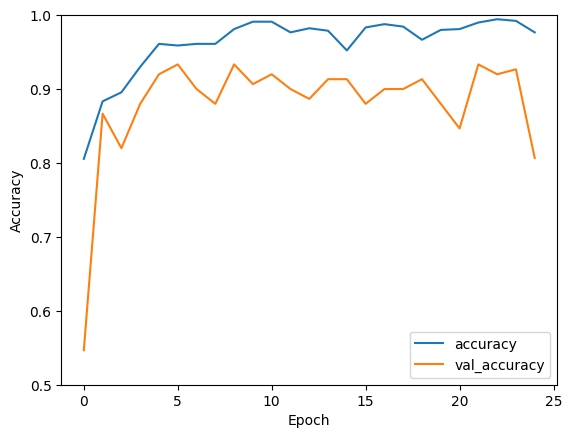

In [21]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(validation_data)

In [22]:
print(test_acc)

0.8066666722297668


In [25]:
for image, label in validation_data:
  break
image = image.numpy()
label = label.numpy()
predicted_label = model.predict(image)
predicted_label = list(map(lambda val : np.argmax(val), predicted_label))
predicted_label

1/1 [==============================] - 0s 77ms/step


[2, 1, 2, 1, 1, 0, 0, 1, 0, 2, 1, 1, 1, 2, 1, 1]

In [33]:
len(predicted_label)

16

In [27]:
num_classes = ["cat","dog","rabbit"]

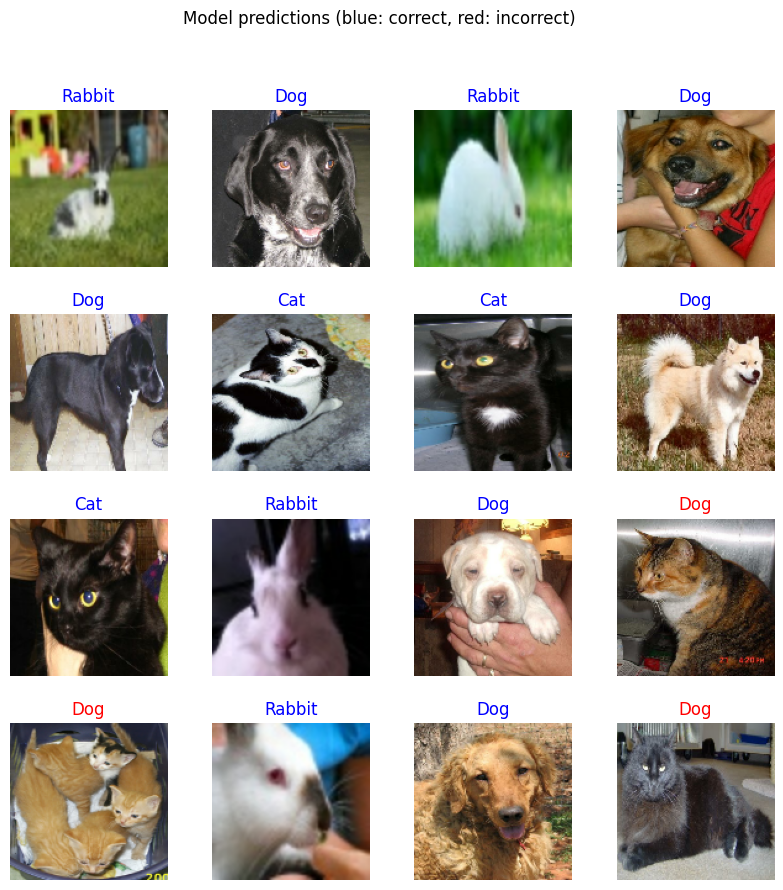

In [40]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.subplots_adjust(hspace = 0.3)
    plt.imshow(image[i].astype("uint8"))
    color = "blue" if predicted_label[i] == label[i] else "red"
    plt.title(num_classes[predicted_label[i]].title(), color=color)
    plt.axis('off')
_ = plt.suptitle("Model predictions (blue: correct, red: incorrect)")